# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pal =  ['#FEEFE5', '#F8C8B0', '#E45011', '#87280E','#0F0608']

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/Clicked%20Ads%20Dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [3]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [4]:
df.describe(include='object')

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [5]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [6]:
# Menghapus kolom
df.drop('Unnamed: 0',1,inplace=True)

## Modifikasi kolom datetime

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
df['hari'] = pd.to_datetime(df['Date']).dt.day
df['hari_dalam_minggu'] = pd.to_datetime(df['Date']).dt.day_of_week
df['minggu'] = pd.to_datetime(df['Date']).dt.week
df['bulan'] = pd.to_datetime(df['Date']).dt.month

df.drop(['Timestamp','Date'],1, inplace=True)

In [8]:
df[['jam','menit','detik']] = df['Time'].astype(str).str.split(':', expand=True)
df['jam'] = df['jam'].astype(int)

In [9]:
#Group Labeling Waktu
conditions = [
    df['jam'].isin(list(range(0,4))),
    df['jam'].isin(list(range(4,11))),
    df['jam'].isin(list(range(11,15))),
    df['jam'].isin(list(range(15,19))),
    df['jam'].isin(list(range(19,25)))
]

choices = ['malam', 'pagi', 'siang', 'sore', 'malam']

df['waktu_iklan'] = np.select(conditions, choices)


In [10]:
#Menghapus kolom yang tidak perlu
df.drop(['jam','detik','menit','Time'], 1,inplace=True)

## Mengisi Null Value

In [11]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),
                                      inplace=True)
df['Male'].fillna('Perempuan',
                  inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),
                                  inplace=True)

In [12]:
# Mengisi Null Value dengan median tiap city

#Agregasi median income
income_median = df.groupby('city').agg({'Area Income':
                                        'median'}).reset_index() 
#Mengambil dataframe null
df_null = df[df['Area Income'].isnull()]
#Membuat dataframe baru
df_fillna = df_null.merge(income_median,
                          on='city',
                          how='left')
df_fillna.drop('Area Income_x',1,inplace=True)
df_fillna.rename(columns=({'Area Income_y': 'Area Income'}),inplace=True)
df_fillna = df_fillna[list(df.columns)] 

df_clean = df.append(df_fillna) #Append ke dataframe baru
df_clean.dropna(inplace=True) #Delete null value
df_clean = df_clean.reset_index(drop=True) #Reset index

In [13]:
#Merubah Value Target
df_clean['Clicked on Ad'].replace({'Yes':1,'No':0},inplace=True)

In [14]:
#Merubah nama kolom
df_clean.rename(columns={'Male':'jenis_kelamin'},inplace=True)

# EDA

In [ ]:
#Memisahkan categorical dan numeric value
cat = ['jenis_kelamin', 'Clicked on Ad', 'city',
       'province', 'category', 'waktu_iklan']
num = ['Daily Time Spent on Site', 'Age',
       'Area Income', 'Daily Internet Usage']

## Univariate Analysis

### Categorical

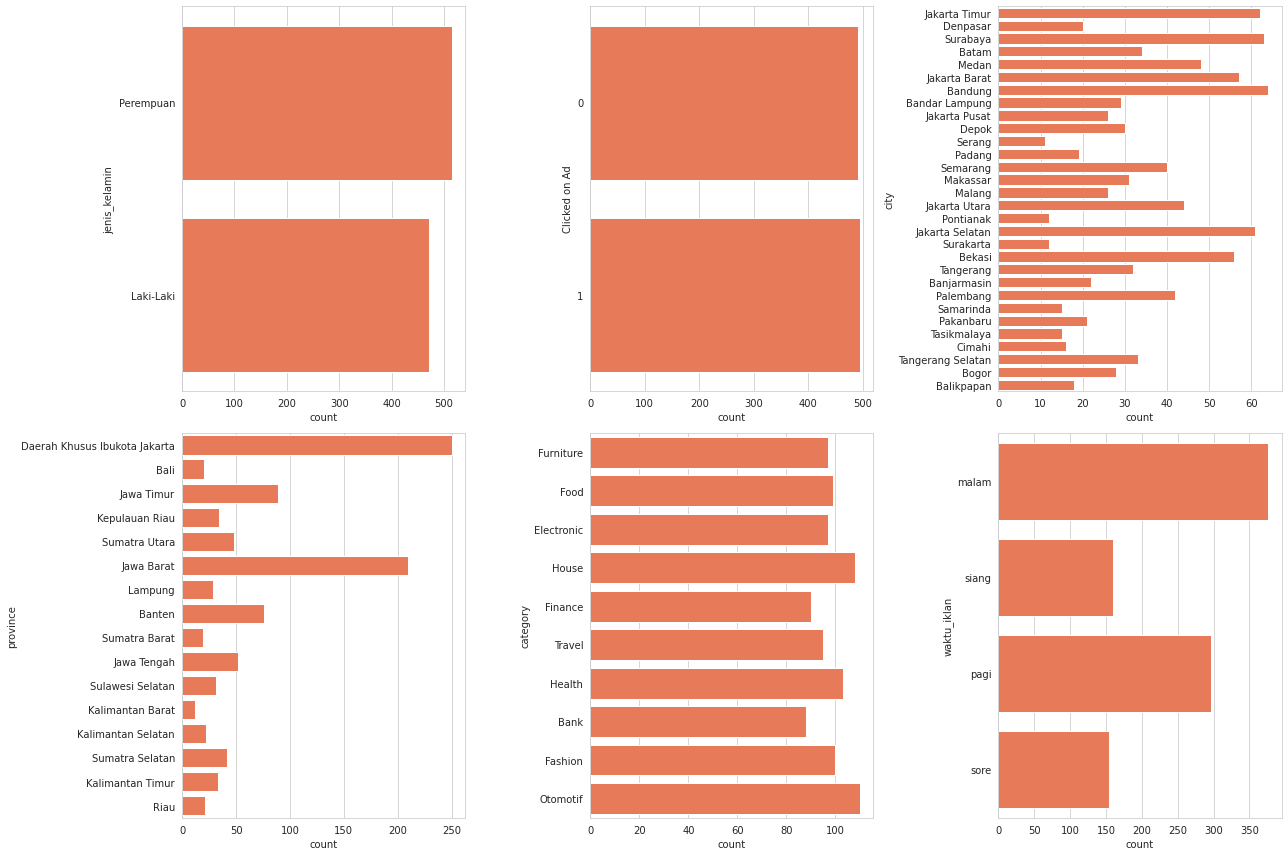

In [ ]:
#Visualisasi data menggunakan countplot
sns.set_style(None)
plt.figure(figsize=(18,12))
for i in range(0, len(cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(y=df_clean[cat[i]], palette=['#ff6d40'])
    plt.tight_layout()

- Jenis kelamin dan clicked on ad memiliki jumlah proporsi masing-masing yang cukup berimbang. 
- Iklan paling banyak ditayangkan di wilayah DKI Jakarta dan Jawa Barat pada pagi dan malam hari.
- Fitur kategori memiliki proporsi yang beragam.

### Numeric

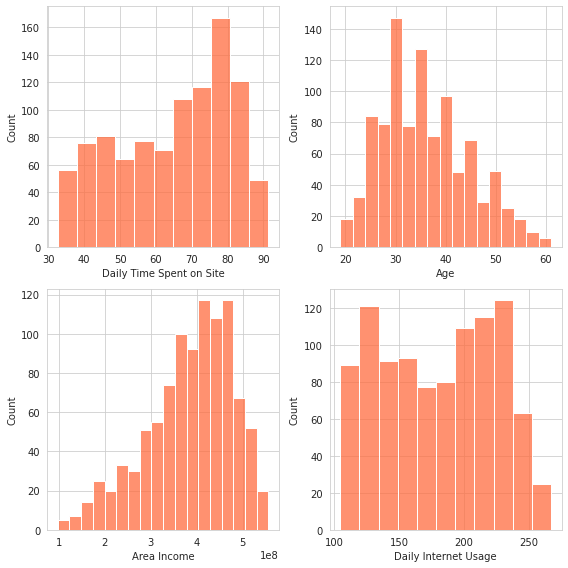

In [ ]:
#Visualisasi menggunakan histplot
plt.figure(figsize=(8,8))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df_clean[num[i]], color='#ff6d40')
    plt.tight_layout()

- Konsumen paling banyak menghabiskan waktu mengunjungi website sekitar 70 - 80 menit.
- Area Income memiliki kecondongan negatif (banyak golongan menengah keatas), hal ini karena banyaknya target konsumen yang berasal dari DKI Jakarta.
- Yang menjadi target paling banyak adalah konsumen rentang umur 25-35 tahun.

## Bivariate

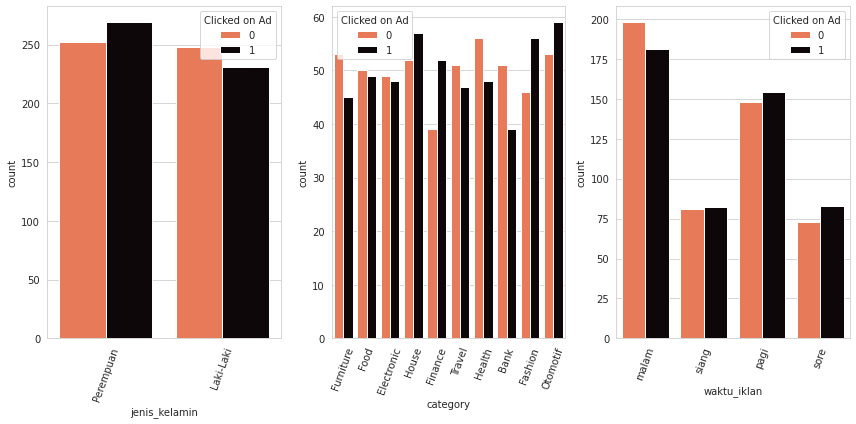

In [ ]:
# Bivariate 1
cat1 = ['jenis_kelamin', 'category','waktu_iklan']
plt.figure(figsize=(12,6))
for i in range(0, len(cat1)):
    plt.subplot(1, 3, i+1) 
    sns.countplot(data=df_clean, x=cat1[i], hue='Clicked on Ad', palette=['#ff6d40','#0F0608'])
    plt.tight_layout()
    plt.xticks(rotation=70)

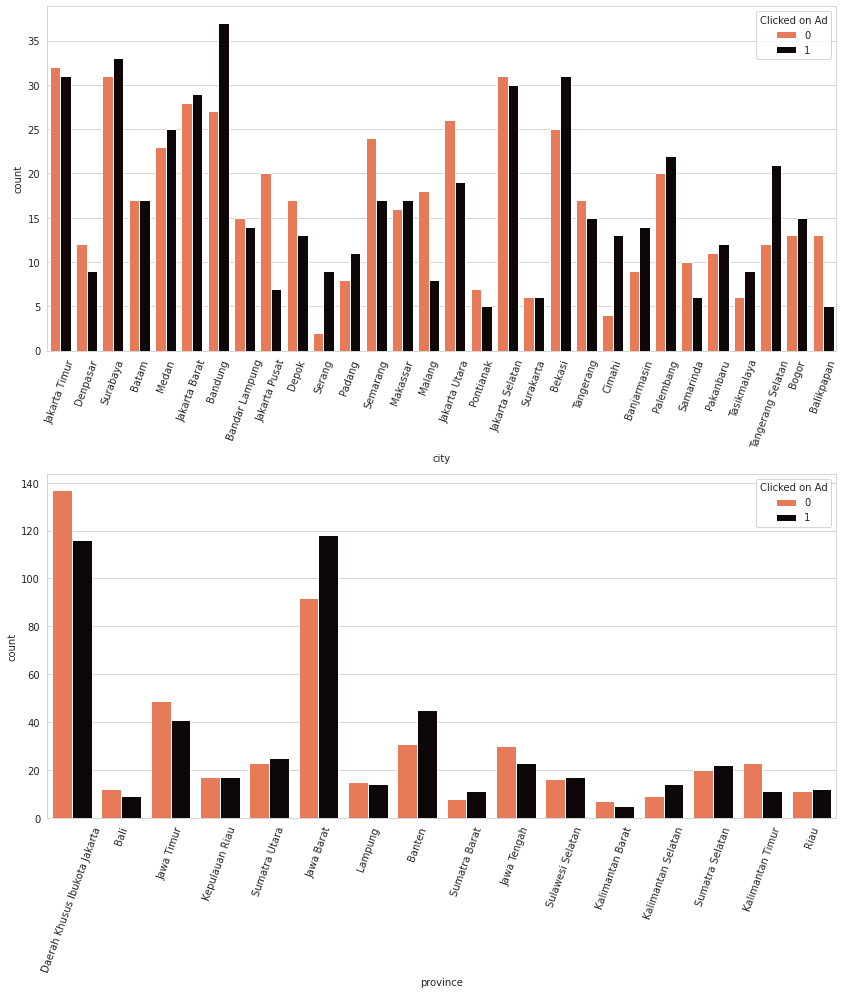

In [ ]:
# Bivariate 2
cat2 = ['city','province']
plt.figure(figsize=(12,12))
for i in range(0, len(cat2)):
    plt.subplot(2, 1, i+1) 
    sns.countplot(data=df_clean, x=cat2[i], hue='Clicked on Ad', palette=['#ff6d40','#0F0608'])
    plt.tight_layout()
    plt.xticks(rotation=70)

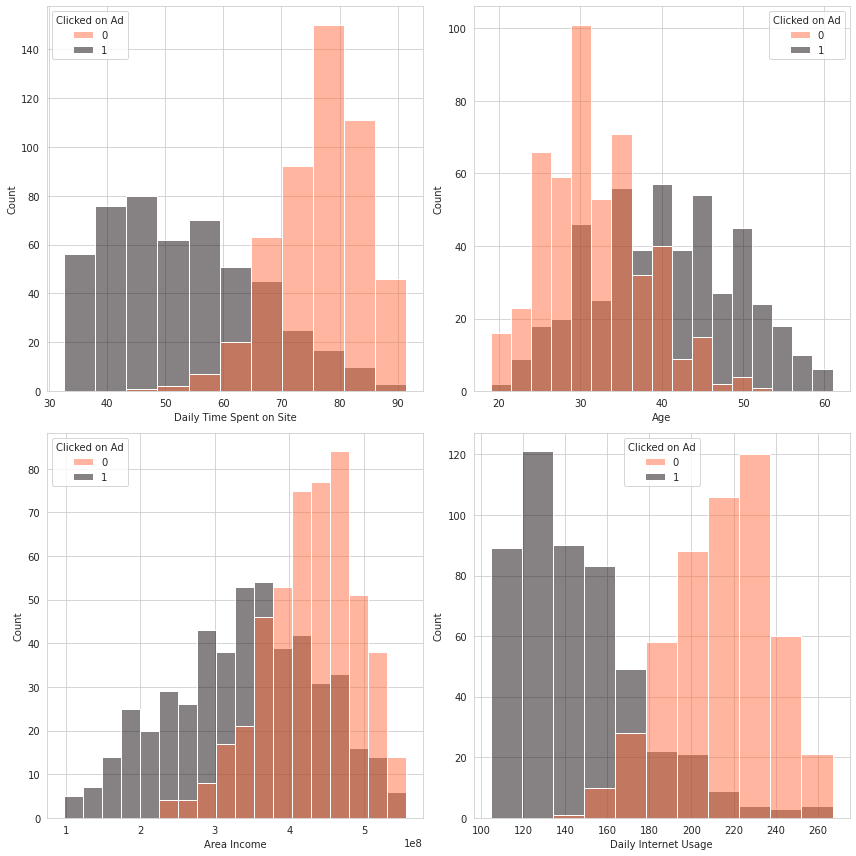

In [ ]:
#Bivariate 3

plt.figure(figsize=(12,12))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1) 
    sns.histplot(data=df_clean, x=num[i], hue='Clicked on Ad', palette=['#ff6d40','#0F0608'])
    plt.tight_layout()

Konsumen yang mengklik iklan memiliki kecenderungan sebagai berikut:
- Waktu yang dihabiskan di website rendah
- Umur diatas 35 tahun
- Area Income menengah kebawah
- Tidak terlalu lama menghabiskan waktu di internet
- Jenis kelamin perempuan
- Waktu malam

## Multivariate

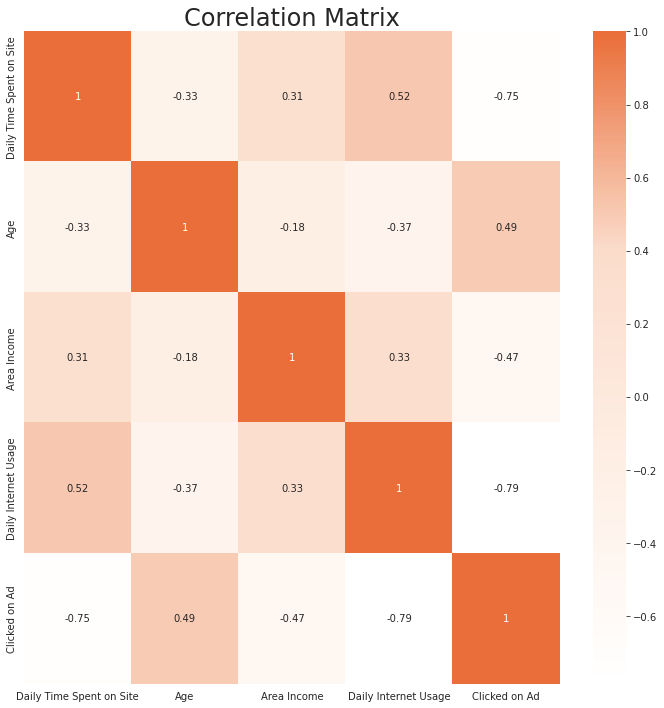

In [ ]:
#Correlation Matrix
colors = ["#ffffff",'#FEEFE5', "#FBDCCB", "#E96E39"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(12,12))
sns.heatmap(data=df_clean.corr(),
            annot=True, cmap=cmap)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

Daily Internet Usage dan Daily Time Spent on Site memiliki korelasi negatif cukup kuat terhadap Clicked on Ad, yang berarti semakin sedikit penggunaan internet harian maupun waktu dalam website, konsumen cenderung lebih mengklik iklan. Area Income (negatif) dan Age(Positif) memiliki juga memiliki korelasi yang dengan Clicked on Ad, tetapi korelasinya tidak terlalu tinggi.

In [ ]:
# pip install ppscore

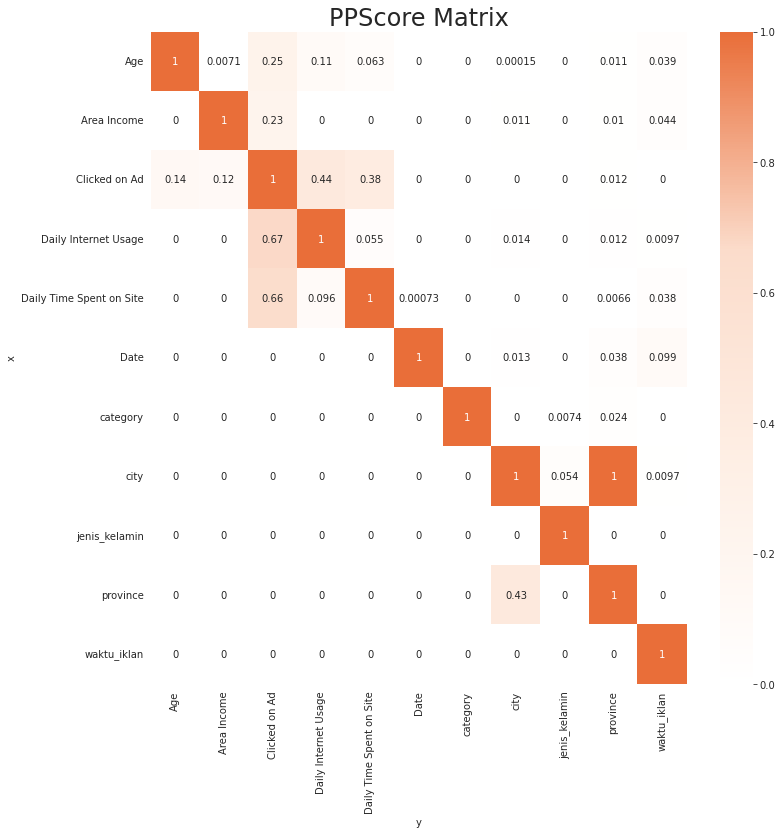

In [ ]:
# PPScore

import ppscore as pps
matrix = pps.matrix(df_clean)
matrix = matrix.pivot('x','y','ppscore')

#Plot PPScore
plt.figure(figsize=(12,12))
sns.heatmap(data=matrix,
            annot=True, cmap=cmap)
plt.title('PPScore Matrix', fontsize=24)
plt.show()

Berdasarkan Predictive Power Score (PPS), fitur yang bisa menjadi prediktor bagi Clicked on Ad adalah Daily Usage dan Daily Time Spent on Site. Age dan Area Income juga bisa menjadi prediktor bagi Clicked on Ad, tetapi nilai prediktornya tidak terlalu kuat.


# Data Preprocessing

## Feature Encoding

In [15]:
df_encode = df_clean.copy()

In [16]:
df_encode.describe(include='object')

,jenis_kelamin,city,province,category,waktu_iklan
count,1000,1000,1000,1000,1000
unique,2,30,16,10,4
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif,malam
freq,521,64,253,112,379


City memiliki banyak sekali jumlah unique value, sehingga fitur tersebut akan dihapus untuk mencegah overfitting.

In [17]:
df_encode.drop('city',1,inplace=True)

In [18]:
#Label

df_encode.jenis_kelamin.replace({'Perempuan':0,
                                 'Laki-Laki':1},inplace=True)

In [19]:
#One Hot Encoding
onehot = ['province',
          'category','waktu_iklan']
for i in onehot:
    onehots = pd.get_dummies(df_encode[i], prefix=i)
    df_encode = df_encode.join(onehots)
    
df_encode = df_encode.drop(columns=onehot, axis =1)

## Train Test Split

In [20]:
# Pemisahan Features vs Target

X = df_encode.drop(columns=['Clicked on Ad'], axis=1)
y = df_encode['Clicked on Ad']
print(X.shape)
print(y.shape)

(1000, 39)
(1000,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42)

## Feature Transformation

In [22]:
# Fitur transformasi menggunakan log
transform = ['Daily Time Spent on Site', 'Age',
             'Area Income', 'Daily Internet Usage']

X_train.loc[:, transform] = np.log(X_train[transform])
X_test.loc[:, transform] = np.log(X_test[transform])

## Feature Standardization

In [23]:
#Merubah skala fitur menjadi 0,1
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

X_train[transform] = ss.fit_transform(X_train[transform].values.reshape(len(X_train),4))

X_test[transform] = ss.fit_transform(X_test[transform].values.reshape(len(X_test),4))

# Data Modeling

## Auto ML

**Data Modeling dilakukan menggunakan auto-sklearn.**

In [24]:
# pip install auto-sklearn

In [25]:
import autosklearn.classification

In [26]:
# Inisiasi model
model = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=7*60, per_run_time_limit=30, n_jobs=2)

# Fitting model
model.fit(X_train, y_train)

# Ringkasan evaluasi auto ml
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: a1d5cce4-f218-11ec-812c-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.986486
  Number of target algorithm runs: 56
  Number of successful target algorithm runs: 53
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [27]:
print(model.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
3            1             0.12        random_forest  0.013514  14.244365
27           2             0.04        random_forest  0.018018   4.961925
18           3             0.04        random_forest  0.018018   4.855601
43           4             0.04        random_forest  0.027027   5.623130
40           5             0.02          extra_trees  0.027027   8.910998
32           6             0.02        random_forest  0.027027   8.045685
28           7             0.04        random_forest  0.027027   6.491209
26           8             0.02  k_nearest_neighbors  0.027027   3.342493
2            9             0.06        random_forest  0.031532  11.676269
8           10             0.02                  mlp  0.036036  13.621931
17          11             0.02             adaboost  0.036036   3.672776
29          12             0.02       

## Evaluasi model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

#Confusion plot
def fixConfusion(y_pred_train, y_train):
  v_array = confusion_matrix(y_pred_train, y_train)
  tes=v_array
  tes2=[[],[]]
  n=len(tes)-1
  for i in range(0,len(tes)):
    m=len(tes[i])-1
    for j in range(0, len(tes[i])):
      tes2[i].append(tes[n][m])     
      m-=1
    n-=1
  import matplotlib
  colors = ["#ffffff",'#FEEFE5', "#FBDCCB", "#E96E39"]
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
  tes2=np.array(tes2)
  sns.heatmap(tes2, annot=tes2, fmt='', cmap=cmap)

In [29]:
#Evaluation
eval_classification(model)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.99
Recall (Test Set): 0.95
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95
AUC (train-proba): 1.00
AUC (test-proba): 0.99


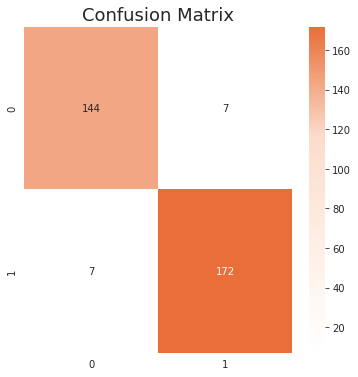

In [38]:
#Confusion Plot
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix',
          fontsize=18)
y_pred = model.predict(X_test)
fixConfusion(y_test, y_pred)

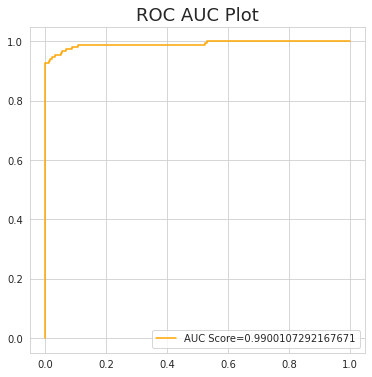

In [39]:
#ROC Plot
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="AUC Score="+str(auc),
         color = 'orange')
plt.title('ROC AUC Plot',
          fontsize=18)
plt.legend(loc=4)
plt.show()

## Menyimpan Model

In [32]:
import pickle

In [33]:
# save model
with open('customer-click-ad-classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

## Menjelaskan Model

In [34]:
# pip install shap

In [35]:
import shap

In [36]:
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 128))
shap_values = explainer.shap_values(X_test[:100], nsamples=10)

[WARNING] [2022-06-22 10:54:18,969:shap] Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

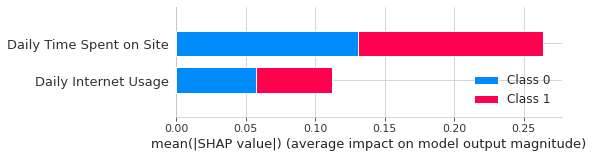

In [47]:
shap.summary_plot(shap_values, X_test.values, feature_names = X.columns,
                  max_display=2)

Fitur yang paling berpengaruh kepada model adalah Daily Time Spent on Site, Daiily Internet Usage, Age dan Area Income.